In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime 
from pandas_datareader import data

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [8]:
data1 = pd.read_csv('2014년 졸음운전 교통사고.csv',encoding='euc-kr') 
data2 = pd.read_csv('2015년 졸음운전 교통사고.csv',encoding='euc-kr') 
data3 = pd.read_csv('2016년 졸음운전 교통사고.csv',encoding='euc-kr') 

In [10]:
# 3개의 데이터를 병합
data = pd.concat([data1,data2,data3])
data.set_index('구분',inplace=True)
data

,사고(건),사망(명),부상(명)
구분,,,
2014년1월,169,7,347
2014년2월,145,3,268
2014년3월,206,12,358
2014년4월,182,4,360
2014년5월,218,17,474
2014년6월,233,13,457
2014년7월,229,14,431
2014년8월,222,9,447
2014년9월,225,15,430


In [12]:
# 년도, 월별로 인덱스를 설정(멀티인뎃스)하고 데이터 확인
ans2 = data.copy()
ans2.index = pd.to_datetime(ans2.index, format='%Y년%m월')
ans2.set_index([ans2.index.year,ans2.index.month], inplace=True)
ans2.index.names = ['년도','월']
ans2

사고(건)  사망(명)  부상(명)
년도   월                      
2014 1     169      7    347
     2     145      3    268
     3     206     12    358
     4     182      4    360
     5     218     17    474
     6     233     13    457
     7     229     14    431
     8     222      9    447
     9     225     15    430
     10    210     14    392
     11    209     10    386
     12    178     12    329
2015 1     205      8    375
     2     175      8    375
     3     237      4    492
     4     227     10    486
     5     231      9    504
     6     207      8    401
     7     273      7    556
     8     268     19    534
     9     252     10    501
     10    214     14    475
     11    199      3    398
     12    213      8    428
2016 1     192      5    387
     2     174      6    328
     3     217      7    435
     4     216      7    419
     5     239     13    522
     6     200     12    362
     7     227      9    460
     8     230      7    490
     9     187     13    347
     10    183     10    367
     11    200      5    418
     12    168      4    364

In [17]:
# 년도 및 월별 평균 사망자 확인
y = ans2.groupby('년도').mean()[['사망(명)']]
m = ans2.groupby('월').mean()[['사망(명)']]
y, m

(          사망(명)
 년도             
 2014  10.833333
 2015   9.000000
 2016   8.166667,
         사망(명)
 월            
 1    6.666667
 2    5.666667
 3    7.666667
 4    7.000000
 5   13.000000
 6   11.000000
 7   10.000000
 8   11.666667
 9   12.666667
 10  12.666667
 11   6.000000
 12   8.000000)

In [18]:
# 2016년 사고대비 사망율 확인
d_2016 = ( ans2.loc[2016])['사망(명)'].sum()/( ans2.loc[2016])['사고(건)'].sum()
d_2016

0.04027949034114262

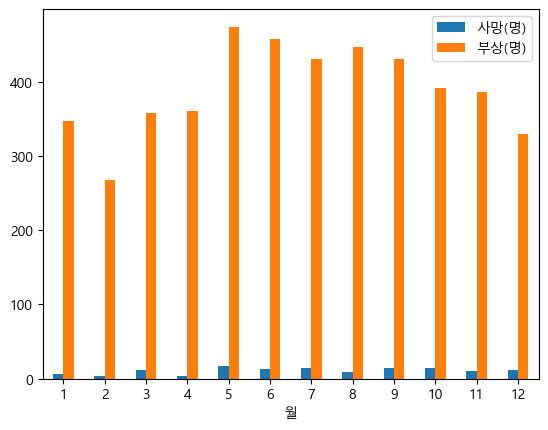

In [19]:
# 2014년도 월별 사망, 부상 데이터를 바 차트로 확인
ans2.loc[2014][['사망(명)','부상(명)']].plot(kind='bar',rot=0)
plt.show()

In [21]:
# 2015년 대비 사망이 가장 많이 증가한 2016년도 월 확인
(ans2.loc[2016,'사망(명)'] - ans2.loc[2015,'사망(명)']).nlargest(1,keep='all')

월
5    4
6    4
Name: 사망(명), dtype: int64